In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
!nvidia-smi

Mon May 23 15:49:37 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   40C    P8     9W /  70W |      0MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [3]:
import torch
import numpy as np
import matplotlib.pyplot as plt
import cv2 as cv
import sys

In [6]:
%cd /content/gdrive/MyDrive/Bioimage\ Informatics

/content/gdrive/.shortcut-targets-by-id/1KBLLeRYGQsIfkELFrExLiWHh1WVbHC7P/Bioimage Informatics


In [7]:
#!git clone https://github.com/junyanz/pytorch-CycleGAN-and-pix2pix
%cd pytorch-CycleGAN-and-pix2pix
!pip install -r requirements.txt

/content/gdrive/.shortcut-targets-by-id/1KBLLeRYGQsIfkELFrExLiWHh1WVbHC7P/Bioimage Informatics/pytorch-CycleGAN-and-pix2pix
     |████████████████████████████████| 676 kB 46.6 MB/s 
     |████████████████████████████████| 1.8 MB 70.9 MB/s 
     |████████████████████████████████| 54 kB 1.9 MB/s 
     |████████████████████████████████| 145 kB 57.8 MB/s 
     |████████████████████████████████| 181 kB 65.4 MB/s 
     |████████████████████████████████| 63 kB 2.3 MB/s 
  Created wheel for visdom: filename=visdom-0.1.8.9-py3-none-any.whl size=655250 sha256=9cca2970b1c40b2d4a2670a90afdb2bd0e71d9e0246fcff727e99550dfa8adc4
  Stored in directory: /root/.cache/pip/wheels/2d/d1/9b/cde923274eac9cbb6ff0d8c7c72fe30a3da9095a38fd50bbf1
  Created wheel for pathtools: filename=pathtools-0.1.2-py3-none-any.whl size=8806 sha256=5670a13040be86fddc8acb1fb4760eac286d4e3b9b50b383bef4d9072aeca871
  Stored in directory: /root/.cache/pip/wheels/3e/31/09/fa59cef12cdcfecc627b3d24273699f390e71828921b2cbba2
  Created 

In [ ]:
#wandb api key
#f388ef8dba82b460ea7900f66d4e0107294bbcc1

## Cycle GAN Training

In [ ]:
!python supervised_train.py --dataroot ../Image\ Synthesis/ --name Evan_5_6_1_SL --checkpoints_dir ../checkpoints/ --model cycle_gan --batch_size 4 --input_nc 1 --output_nc 1 --gpu_ids 0 --direction AtoB --save_epoch_freq 5 --preprocess crop --lr .0001 --pretrain 1 --SSL 1 --SLsubdirec ../label_data/ 

In [ ]:
!python train.py --dataroot ../Image\ Synthesis/ --name Evan_5_6_2_SSL --checkpoints_dir ../checkpoints/ --model cycle_gan --batch_size 4 --input_nc 1 --output_nc 1 --gpu_ids 0 --direction AtoB --save_epoch_freq 5 --use_wandb --preprocess crop --lr .0001 --pretrain 0 --SSL 1 --SLsubdirec ../label_data/ 

----------------- Options ---------------
               SLsubdirec: ../label_data/                	[default: ]
                      SSL: 1                             	[default: 0]
               batch_size: 4                             	[default: 1]
                    beta1: 0.5                           
          checkpoints_dir: ../checkpoints/               	[default: ./checkpoints]
           continue_train: False                         
                crop_size: 256                           
                 dataroot: ../Image Synthesis/           	[default: None]
             dataset_mode: unaligned                     
                direction: AtoB                          
              display_env: main                          
             display_freq: 400                           
               display_id: 1                             
            display_ncols: 4                             
             display_port: 8097                          
         

Text(0, 0.5, 'SSL Loss')

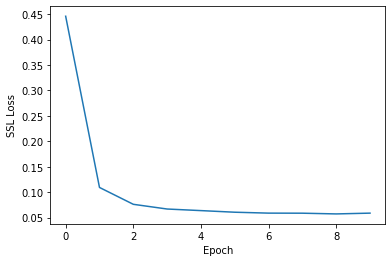

In [ ]:
data = np.load("/content/gdrive/MyDrive/Bioimage Informatics/pytorch-CycleGAN-and-pix2pix/SSL_Evan_5_6_1_SL.npy",allow_pickle= True)

plt.figure()
plt.plot(np.arange(len(data)),data)
plt.xlabel("Epoch")
plt.ylabel("SSL Loss")

## Cycle GAN Testing 

In [ ]:
%mkdir ../denoise_results

mkdir: cannot create directory ‘../denoise_results’: File exists


In [ ]:
!python test.py --dataroot ../Image\ Synthesis/testA --checkpoints_dir ../checkpoints --name Evan_5_6_2_SSL --model test --results_dir ../denoise_results --num_test 36 --input_nc 1 --output_nc 1 --gpu_ids 0 --direction AtoB --no_dropout

----------------- Options ---------------
               SLsubdirec:                               
             aspect_ratio: 1.0                           
               batch_size: 1                             
          checkpoints_dir: ../checkpoints                	[default: ./checkpoints]
                crop_size: 256                           
                 dataroot: ../Image Synthesis/testA      	[default: None]
             dataset_mode: single                        
                direction: AtoB                          
          display_winsize: 256                           
                    epoch: latest                        
                     eval: False                         
                  gpu_ids: 0                             
                init_gain: 0.02                          
                init_type: normal                        
                 input_nc: 1                             	[default: 3]
                  isTrain: False  

In [ ]:
!tar cvzf Ellipse2.tar.gz denoise_results/Ellipse_2

Moving Image files around

In [ ]:
import os
import natsort


IMG_EXTENSIONS = [
    '.jpg', '.JPG', '.jpeg', '.JPEG',
    '.png', '.PNG', '.ppm', '.PPM', '.bmp', '.BMP',
    '.tif', '.TIF', '.tiff', '.TIFF',
]


def is_image_file(filename):
    return any(filename.endswith(extension) for extension in IMG_EXTENSIONS)

images = []

for root, _, fnames in sorted(os.walk('../label_data/Annotated/mcherry')):
        for fname in fnames:
            if is_image_file(fname):
                path = fname
                # path = os.path.join(root, fname)
                images.append(path)

In [ ]:
sort = natsort.natsorted(images)
sort

['result_1.png',
 'result_2.png',
 'result_3.png',
 'result_5.png',
 'result_6.png',
 'result_7.png',
 'result_9.png',
 'result_10.png',
 'result_11.png',
 'result_12.png',
 'result_30.png',
 'result_33.png',
 'result_38.png',
 'result_39.png',
 'result_41.png',
 'result_42.png',
 'result_48.png',
 'result_50.png',
 'result_53.png',
 'result_54.png',
 'result_55.png',
 'result_57.png',
 'result_58.png',
 'result_59.png']

In [ ]:
GFP = []
mCherry = []
for file in sort:

    split = file.split('/')

    if split[1] == 'GFP':
      GFP.append(split[2].split("_")[1].split(".")[0])
    
    elif split[1] =='mcherry':
      mCherry.append(split[2].split("_")[1].split(".")[0])


Testing that the Resize transformation is consistent across the images

In [ ]:
import torch
import torch.utils.data as data
import torchvision.transforms as transforms
from PIL import Image

In [ ]:
annoted = '/content/gdrive/MyDrive/Bioimage Informatics/label_data/Annotated/GFP/result_0.png'
intput = '/content/gdrive/MyDrive/Bioimage Informatics/label_data/Input/GFP/test_c0_t0.jpg'

trainA = '/content/gdrive/MyDrive/Bioimage Informatics/Image Synthesis/trainA/channel_0_001.jpg'
trainB = '/content/gdrive/MyDrive/Bioimage Informatics/Image Synthesis/trainB/synth_0.jpg'

img1 = Image.open(annoted)
img2 = img1.copy()
img1 = transforms.ToTensor()(img1)
img1.shape
img1 = transforms.Resize(148)(img1)

img2 = transforms.ToTensor()(img2)
img2 = transforms.Resize(148)(img2)
transforms.ToPILImage()(img2)
transforms.ToPILImage()(img1)

torch.nn.MSELoss()(img1,img2)


tensor(0.)